In [17]:
import pandas as pd

# Load multiple datasets
df1 = pd.read_csv(r'C:/Users/sabni/Documents/SKILL/adult_1.csv')
df2 = pd.read_csv(r'C:/Users/sabni/Documents/SKILL/adult_2.csv')
df3 = pd.read_csv(r'C:/Users/sabni/Documents/SKILL/adult_3.csv')
df4 = pd.read_csv(r'C:/Users/sabni/Documents/SKILL/adult_4.csv')
df5 = pd.read_csv(r'C:/Users/sabni/Documents/SKILL/adult_5.csv')
# Concatenate along rows (axis=0)
merged_df = pd.concat([df1, df2, df3,df4,df5], axis=0, ignore_index=True)

# Save the merged dataframe
merged_df.to_csv('merged_output.csv', index=False)

print("Datasets merged successfully!")


Datasets merged successfully!


In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(r"C:/Users/sabni/Documents/SKILL/merged_output.csv")
print(df.head(20))
print("\n\n\n\n")

# Drop missing values
df.dropna(axis=0, inplace=True)

# Display info and basic stats
print("DataFrame Info:")
print(df.info())
print("\n\n\n\n")

print("Descriptive Statistics:")
print(df.describe())
print("\n\n\n\n")

# Check for null values
print("Any Null Values Present:")
print(df.isnull().any())
print("\n\n\n\n")

print("Sum of Null Values per Column:")
print(df.isnull().sum())
print("\n\n\n\n")

# Check for duplicates
print("Any Duplicated Rows:")
print(df.duplicated().any())
print("\n\n\n\n")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Save the cleaned DataFrame
output_path = r"C:\Users\sabni\Documents\SKILL\hi2.csv"
df.to_csv(output_path, index=False)



    Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level    BMI  \
0    69  Female        1                    0                Moderate  34.61   
1    32    Male        0                    0                Moderate  22.75   
2    89    Male        0                    1                Moderate  35.32   
3    78    Male        0                    1                Moderate  18.23   
4    38  Female        1                    0                Moderate  19.82   
5    41    Male        0                    1                Moderate  36.11   
6    20    Male        1                    0                     Low  15.12   
7    39  Female        0                    0                Moderate  20.78   
8    70    Male        0                    1                    High  29.20   
9    19  Female        0                    0                    High  35.54   
10   47    Male        1                    0                Moderate  29.86   
11   55  Female        0                

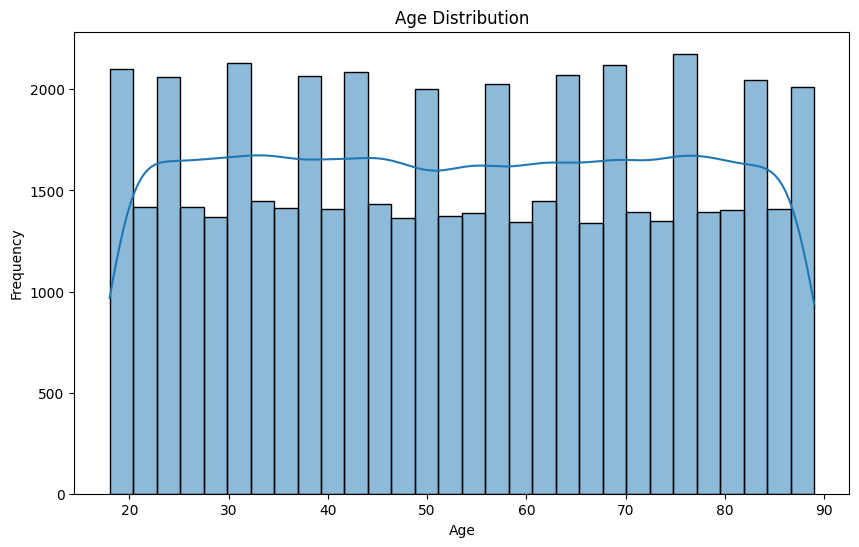

In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



# Plot 1: Histogram of Age with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


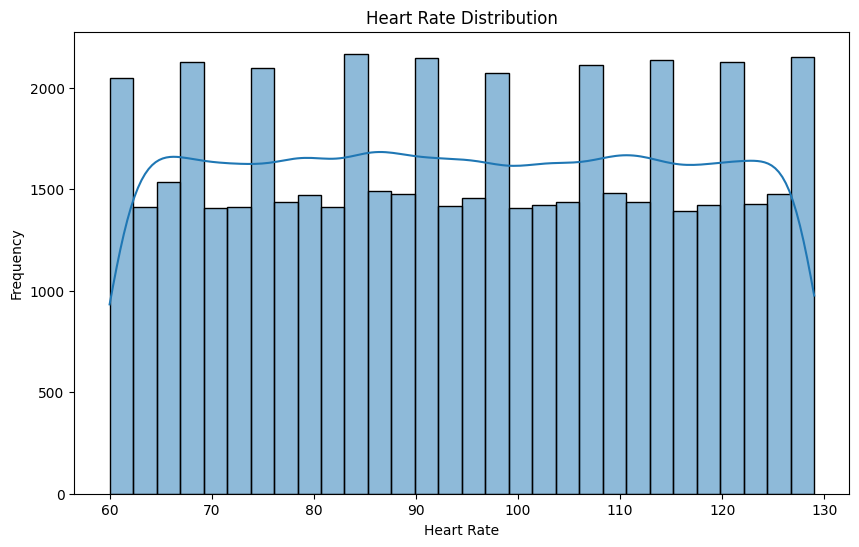

In [20]:

# Plot 2: Histogram of Heart Rate with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart_Rate'], kde=True, bins=30)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

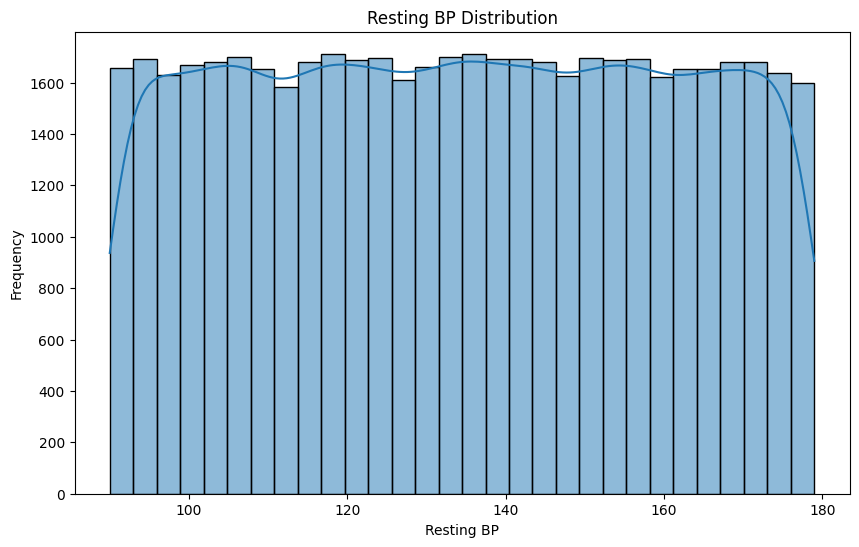

In [21]:
# Plot 3: Histogram of Resting BP with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Resting_BP'], kde=True, bins=30)
plt.title('Resting BP Distribution')
plt.xlabel('Resting BP')
plt.ylabel('Frequency')
plt.show()

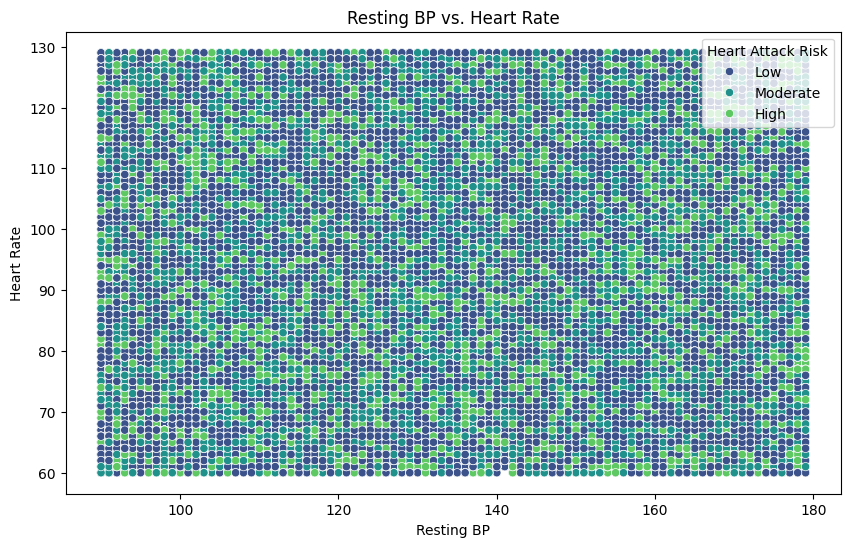

In [22]:
# Plot 4: Scatterplot of Resting_BP vs. Heart_Rate, colored by Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Resting_BP", y="Heart_Rate", hue="Heart_Attack_Risk", palette='viridis')
plt.title('Resting BP vs. Heart Rate')
plt.xlabel('Resting BP')
plt.ylabel('Heart Rate')
plt.legend(title="Heart Attack Risk")
plt.show()

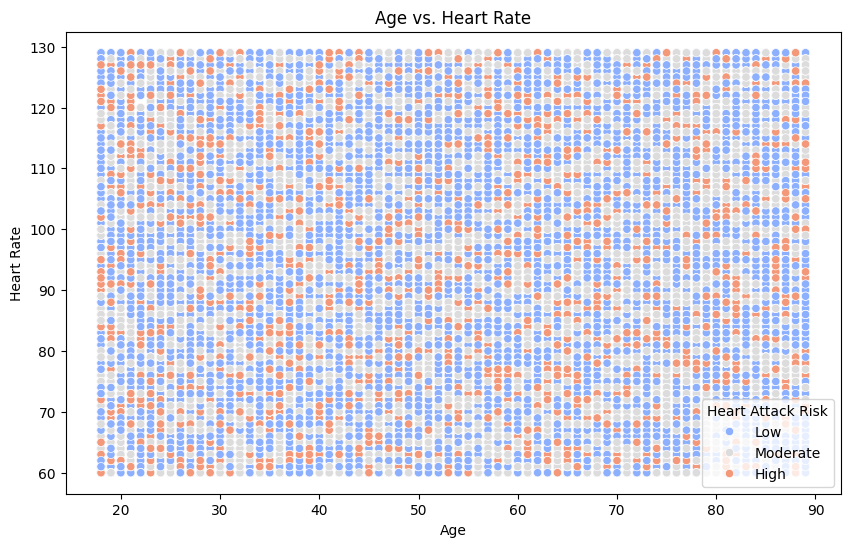

In [23]:
# Plot 5: Scatterplot of Age vs. Heart_Rate, colored by Heart_Attack_Risk
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Heart_Rate", hue="Heart_Attack_Risk", palette='coolwarm')
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(title="Heart Attack Risk")
plt.show()

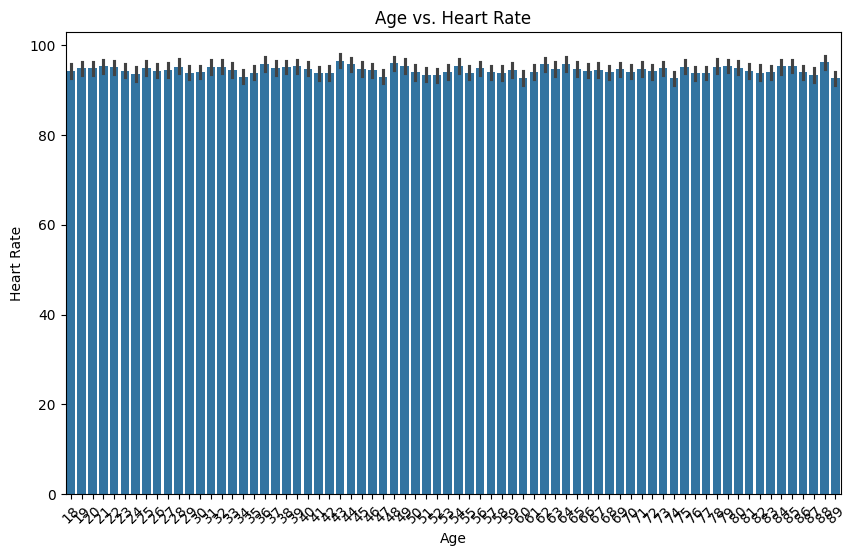

In [24]:
# Plot 6: Bar plot of Age vs. Heart Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y="Heart_Rate", data=df)  # ci=None to avoid confidence intervals
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

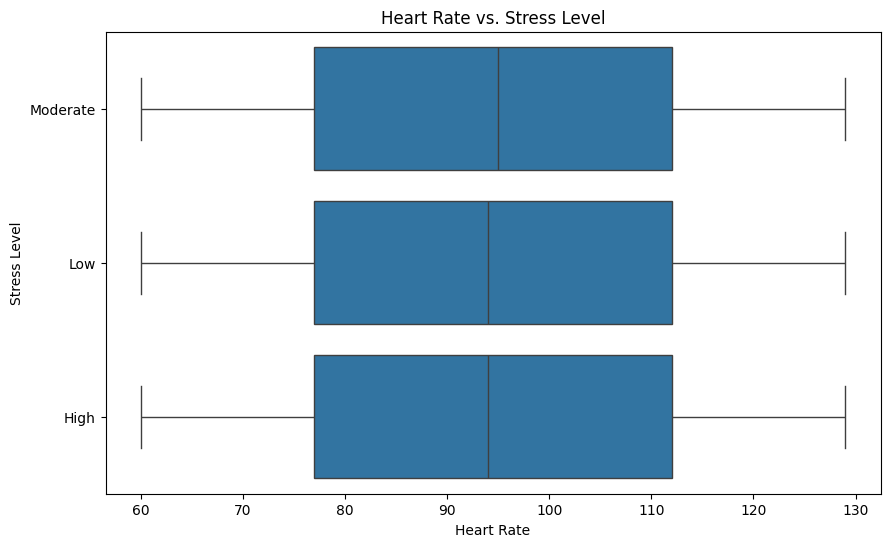

In [25]:

# Plot 7: Box plot of Heart Rate vs. Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart_Rate', y="Stress_Level", data=df)
plt.title('Heart Rate vs. Stress Level')
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.show()

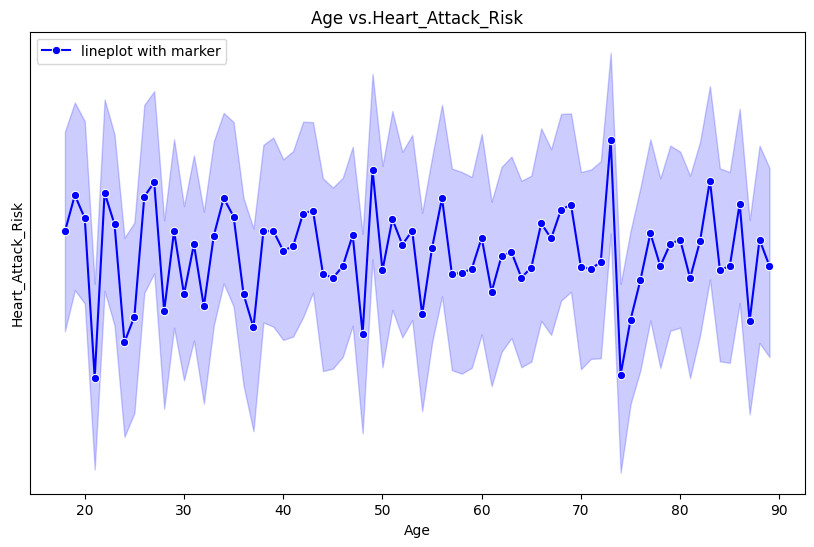

In [26]:
#Plot 8: lineplot with marker of Age vs.Heart_Attack_Risk
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Age",y="Heart_Attack_Risk", label="lineplot with marker", color="blue", marker="o" )
plt.title('Age vs.Heart_Attack_Risk')
plt.xlabel('Age')
plt.ylabel('Heart_Attack_Risk')
plt.show()
# Count the occurrences of each unique value in the 'Heart_Attack_Risk' column
risk_counts = df['Heart_Attack_Risk'].value_counts()


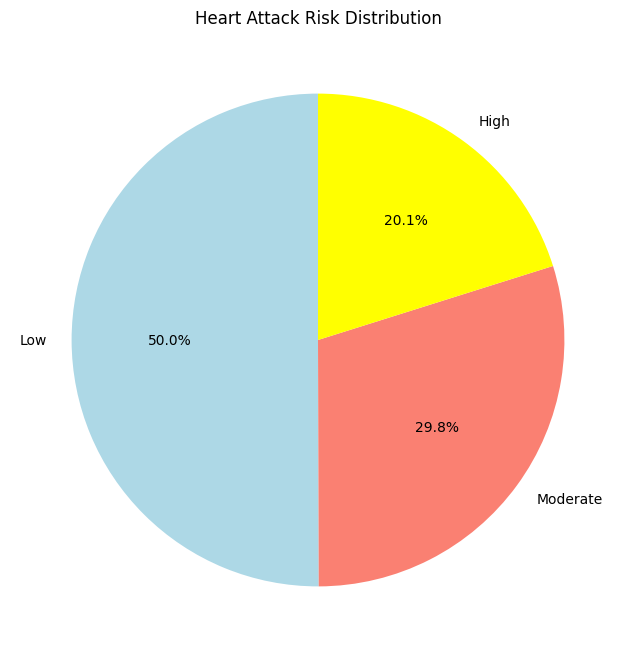

In [27]:

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon','yellow'])
plt.title('Heart Attack Risk Distribution')
plt.show()


In [ ]:
import pandas as pd



# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply the function to remove outliers
df_no_outliers_iqr = remove_outliers_iqr(df)


print("Original DataFrame:")
print(df)
print("\n\n\n\n")
print("\nDataFrame after removing outliers:")
print(df_no_outliers_iqr.head(20))
print("\n\n\n\n")
output_path = r"C:/Users/sabni/Documents/SKILL/hi3.csv"
df_no_outliers_iqr.to_csv(output_path, index=False)



Original DataFrame:
       Age  Gender  Smoking  Alcohol_Consumption Physical_Activity_Level  \
0       69  Female        1                    0                Moderate   
1       32    Male        0                    0                Moderate   
2       89    Male        0                    1                Moderate   
3       78    Male        0                    1                Moderate   
4       38  Female        1                    0                Moderate   
...    ...     ...      ...                  ...                     ...   
49995   21    Male        0                    0                     Low   
49996   35  Female        0                    0                     Low   
49997   46    Male        0                    1                    High   
49998   56    Male        0                    1                     Low   
49999   72    Male        0                    0                    High   

         BMI  Diabetes  Hypertension  Cholesterol_Level  Resting_BP

In [30]:
from scipy.stats import zscore

# Calculate Z-scores for each numeric column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        z_scores = zscore(df[col])
        print(f"Z-scores for column '{col}':")
        print(z_scores)


# Function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=1):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            z_scores = zscore(df[col])
            df = df[abs(z_scores) <= threshold]

    return df

# Apply the function to remove outliers
df_no_outliers_zscore = remove_outliers_zscore(df)

output_path = r"C:/Users/sabni/Documents/SKILL/hi4.csv"
df_no_outliers_zscore.to_csv(output_path, index=False)
print("\nDataFrame after removing outliers:")
print(df_no_outliers_zscore.head(20))

Z-scores for column 'Age':
[ 0.75010583 -1.02884309  1.71169984 ... -0.35572728  0.12506972
  0.89434493]
Z-scores for column 'Smoking':
[ 1.53329118 -0.65219184 -0.65219184 ... -0.65219184 -0.65219184
 -0.65219184]
Z-scores for column 'Alcohol_Consumption':
[-0.81986882 -0.81986882  1.21970732 ...  1.21970732  1.21970732
 -0.81986882]
Z-scores for column 'BMI':
[ 0.98138981 -0.6601092   1.0796583  ... -0.84418961  0.33364821
  0.46098203]
Z-scores for column 'Diabetes':
[ 2.00727905 -0.49818684 -0.49818684 ... -0.49818684 -0.49818684
 -0.49818684]
Z-scores for column 'Hypertension':
[-0.65057238 -0.65057238 -0.65057238 ... -0.65057238 -0.65057238
 -0.65057238]
Z-scores for column 'Cholesterol_Level':
[-1.6837857  -1.34442655  1.09111022 ... -1.20591261  0.44009471
 -0.76728513]
Z-scores for column 'Resting_BP':
[ 1.41139111 -0.32554412 -0.4413398  ...  0.44642709  0.63941989
  0.29203285]
Z-scores for column 'Heart_Rate':
[-0.47211159  0.41955479  1.60844331 ... -0.47211159  0.7663139